In [14]:
import pandas as pd

In [15]:
df =pd.read_csv('Divvy Time Series Dataset - Sheet1.csv')

In [16]:
print(df.head())

     Year  Month  Total Counts  Classic Bike Count  Electric Bike Count  \
0  2020.0      4         84776                 NaN                  NaN   
1     NaN      5        200274                 NaN                  NaN   
2     NaN      6        343005                 NaN                  NaN   
3     NaN      7        551480                 NaN               1935.0   
4     NaN      8        622361                 NaN              66195.0   

   Docked Bike Count  Electric Scooter Count  Casual User Count  \
0            84776.0                     NaN              23628   
1           200274.0                     NaN              86909   
2           343005.0                     NaN             154718   
3           549545.0                     NaN             269296   
4           556166.0                     NaN             289661   

   Member User Count  
0              61148  
1             113365  
2             188287  
3             282184  
4             332700  


In [17]:
df.shape

(54, 9)

/var/folders/j2/gbnqt5g13fbdlhczrh40l8780000gn/T/ipykernel_17750/2418856733.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Year"] = df["Year"].fillna(method="ffill")


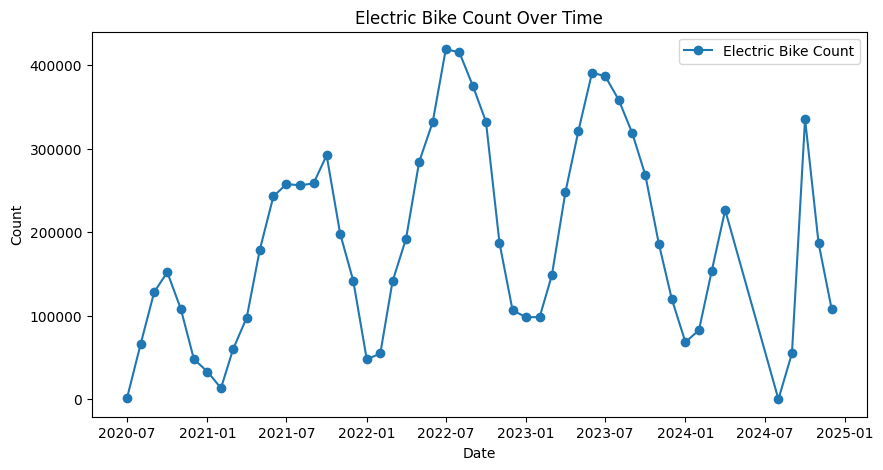

/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bayes/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

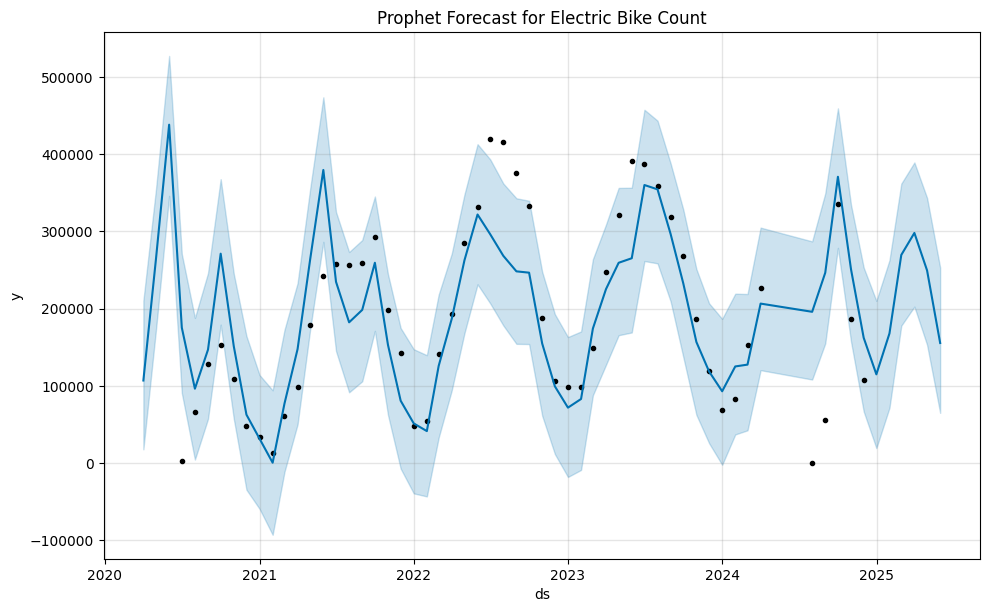

54    149638.698461
55    151374.089096
56    162708.559117
57    166757.348411
58    170967.800181
59    173350.028401
Name: predicted_mean, dtype: float64

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

df["Year"] = df["Year"].fillna(method="ffill")

df["Date"] = pd.to_datetime(df["Year"].astype(int).astype(str) + "-" + df["Month"].astype(str) + "-01")

df = df[["Date", "Electric Bike Count"]].set_index("Date")

df["Electric Bike Count"] = df["Electric Bike Count"].interpolate()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Electric Bike Count"], marker="o", linestyle="-", label="Electric Bike Count")
plt.title("Electric Bike Count Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

arima_model = ARIMA(df["Electric Bike Count"], order=(2, 1, 2))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=6)

prophet_df = df.reset_index().rename(columns={"Date": "ds", "Electric Bike Count": "y"})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future_dates = prophet_model.make_future_dataframe(periods=6, freq="M")
prophet_forecast = prophet_model.predict(future_dates)

prophet_model.plot(prophet_forecast)
plt.title("Prophet Forecast for Electric Bike Count")
plt.show()

arima_forecast